# Using Python for Research Homework: Week 5, Case Study Part 2

The [movie dataset on which this case study is based](https://www.kaggle.com/tmdb/tmdb-movie-metadata) is a database of 5000 movies catalogued by [The Movie Database (TMDb)](https://www.themoviedb.org/?language=en). The information available about each movie is its budget, revenue, rating, actors and actresses, etc. In this case study, we will use this dataset to determine whether any information about a movie can predict the total revenue of a movie. We will also attempt to predict whether a movie's revenue will exceed its budget.

In Part 2, we will use the dataset prepared in Part 1 for an applied analysis.

In [2]:
# DO NOT EDIT THIS CODE
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# EDIT THIS CODE TO LOAD THE SAVED DF FROM THE LAST HOMEWORK
df = pd.read_csv('movies_clean.csv', index_col = 0)
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,Comedy,Romance,Horror,Mystery,War,History,Music,Documentary,TV Movie,Foreign
0,0.019613,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",0.012698,"Ingenious Film Partners, Twentieth Century Fox...",...,0,0,0,0,0,0,0,0,0,0
1,0.019670,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",0.012613,"Walt Disney Pictures, Jerry Bruckheimer Films,...",...,0,0,0,0,0,0,0,0,0,0
2,0.019621,"Action, Adventure, Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,0.012323,"Columbia Pictures, Danjaq, B24",...,0,0,0,0,0,0,0,0,0,0
3,0.019626,"Action, Crime, Drama, Thriller",http://www.thedarkknightrises.com/,49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,0.012374,"Legendary Pictures, Warner Bros., DC Entertain...",...,0,0,0,0,0,0,0,0,0,0
4,0.019636,"Action, Adventure, Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",0.011197,Walt Disney Pictures,...,0,0,0,0,0,0,0,0,0,0


### Exercise 1

In Part 2 of this case study, we will primarily use the two models we recently discussed: linear/logistic regression and random forests to perform prediction and classification. We will use these methods to predict revenue, and we will use logistic regression to classify whether a movie was profitable.

In this exercise, we will instantiate regression and classification models. Code is provided that prepares the covariates and outcomes we will use for data analysis.

#### Instructions
- Instantiate `LinearRegression()`, `LogisticRegression()`, `RandomForestRegressor()`, and `RandomForestClassifier()` objects, and assign them to `linear_regression`, `logistic_regression`, `forest_regression`, and `forest_classifier`, respectively.
- For the random forests models, specify `max_depth=4` and `random_state=0`.

In [3]:
# Define all covariates and outcomes from `df`.
regression_target = 'revenue'
classification_target = 'profitable'
all_covariates = ['budget', 'popularity', 'runtime', 'vote_count', 'vote_average', 'Action', 'Adventure', 'Fantasy', 
                  'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 
                  'Horror', 'Mystery', 'War', 'History', 'Music', 'Documentary', 'TV Movie', 'Foreign']

regression_outcome = df[regression_target]
classification_outcome = df[classification_target]
covariates = df[all_covariates]

# Instantiate all regression models and classifiers.
linear_regression = LinearRegression()
logistic_regression = LogisticRegression()
forest_regression = RandomForestRegressor(max_depth=4, random_state=0)
forest_classifier = RandomForestClassifier(max_depth=4, random_state=0)

### Exercise 2

In this exercise, we will create two functions that compute a model's score. For regression models, we will use correlation as the score. For classification models, we will use accuracy as the score.

#### Instructions 
- Define a function called `correlation` with arguments `estimator`, `X`, and `y`. The function should compute the correlation between the observed outcome `y` and the outcome predicted by the model.
    - To obtain predictions, the function should first use the `fit` method of `estimator` and then use the `predict` method from the fitted object.
    - The function should return the first argument from `r2_score` comparing `predictions` and `y`.
- Define a function called `accuracy` with the same arguments and code, substituting `accuracy_score` for `r2_score`.

In [4]:
def correlation(estimator, X, y):
    predictions = estimator.fit(X, y).predict(X)
    return r2_score(y, predictions)
    
def accuracy(estimator, X, y):
    predictions = estimator.fit(X, y).predict(X)
    return accuracy_score(y, predictions)

### Exercise 3

In this exercise, we will compute the cross-validated performance for the linear and random forest regression models.

#### Instructions 

- Call `cross_val_score` using `linear_regression` and `forest regression` as models. Store the output as `linear_regression_scores` and `forest_regression_scores`, respectively.
    - Set the parameters `cv=10` to use 10-fold cross-validation and `scoring=correlation` to use our `correlation` function defined in the previous exercise.
- Plotting code has been provided to compare the performance of the two models. Use `plt.show()` to plot the correlation between actual and predicted revenue for each cross-validation fold using the linear and random forest regression models.
- Which of the two models exhibits a better fit?

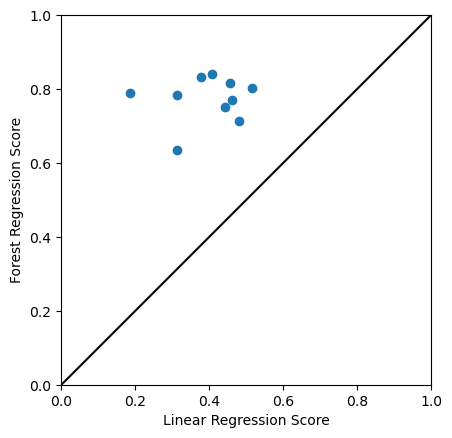

In [8]:
linear_regression_scores = cross_val_score(linear_regression, covariates, regression_outcome, cv=10, scoring=correlation)
forest_regression_scores = cross_val_score(forest_regression, covariates, regression_outcome, cv=10, scoring=correlation)

# Plot Results
plt.axes().set_aspect('equal', 'box')
plt.scatter(linear_regression_scores, forest_regression_scores)
plt.plot((0, 1), (0, 1), 'k-')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Linear Regression Score")
plt.ylabel("Forest Regression Score")

plt.show()

### Exercise 4

In this exercise, we will compute cross-validated performance for the linear and random forest classification models.

#### Instructions 
- Call `cross_val_score` using `logistic_regression` and `forest_classifier` as models. Store the output as `logistic_regression_scores` and `forest_classification_scores`, respectively.
    - Set the parameters `cv=10` to use 10-fold cross-validation and `scoring=accuracy` to use our accuracy function defined in the previous exercise.
- Plotting code has been provided to compare the performance of the two models. Use `plt.show()` to plot the accuracy of predicted profitability for each cross-validation fold using the logistic and random forest classification models.
- Which of the two models exhibits a better fit?

Text(0, 0.5, 'Forest Classification Score')

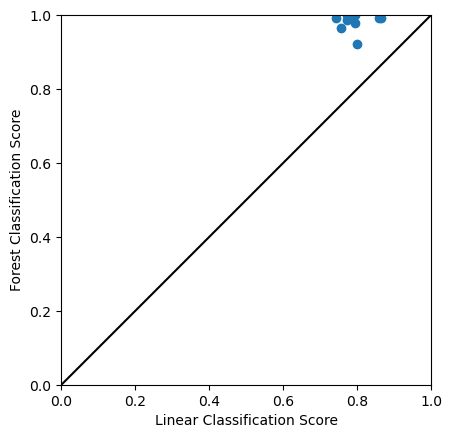

In [10]:
logistic_regression_scores = cross_val_score(logistic_regression, covariates, classification_outcome, cv=10, scoring=accuracy)
forest_classification_scores = cross_val_score(forest_classifier, covariates, classification_outcome, cv=10, scoring=accuracy)

# Plot Results
plt.axes().set_aspect('equal', 'box')
plt.scatter(logistic_regression_scores, forest_classification_scores)
plt.plot((0, 1), (0, 1), 'k-')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Linear Classification Score")
plt.ylabel("Forest Classification Score")

# Show the plot.


### Exercise 5 

In Exercise 3, we saw that predicting revenue was only moderately successful. It might be the case that predicting movies that generated precisely no revenue is difficult. In the next three exercises, we will exclude these movies, and rerun the analyses to determine if the fits improve. In this exercise, we will rerun the regression analysis for this subsetted dataset.

#### Instructions 

- Define `positive_revenue_df` as the subset of movies in `df` with `revenue` greater than zero.
- Code is provided below that creates new instances of model objects. Replace all instances of `df` with `positive_revenue_df`, and run the given code.

In [14]:
positive_revenue_df = df[df["revenue"] > 0]

regression_outcome = positive_revenue_df[regression_target]
classification_outcome = positive_revenue_df[classification_target]
covariates = positive_revenue_df[all_covariates]

# Reinstantiate all regression models and classifiers.
linear_regression = LinearRegression()
logistic_regression = LogisticRegression()
forest_regression = RandomForestRegressor(max_depth=4, random_state=0)
forest_classifier = RandomForestClassifier(max_depth=4, random_state=0)
linear_regression_scores = cross_val_score(linear_regression, covariates, regression_outcome, cv=10, scoring=correlation)
forest_regression_scores = cross_val_score(forest_regression, covariates, regression_outcome, cv=10, scoring=correlation)
logistic_regression_scores = cross_val_score(logistic_regression, covariates, classification_outcome, cv=10, scoring=accuracy)
forest_classification_scores = cross_val_score(forest_classifier, covariates, classification_outcome, cv=10, scoring=accuracy)

np.mean(linear_regression_scores)

0.5578345188897288

### Exercise 6

In this exercise, we will compute the cross-validated performance for the linear and random forest regression models for positive revenue movies only.

#### Instructions 

- Call `cross_val_score` using `linear_regression` and `forest regression` as models. Store the output as `linear_regression_scores` and `forest_regression_scores`, respectively.
    - Set the parameters `cv=10` to use 10-fold cross-validation and `scoring=correlation` to use our `correlation` function defined in the previous exercise.
- Plotting code has been provided to compare the performance of the two models. Use `plt.show()` to plot the correlation between actual and predicted revenue for each cross-validation fold using the linear and random forest regression models.
- Which of the two models exhibits a better fit? Is this result different from what we observed when considering all movies?
- Code is provided for you that prints the importance of each covariate in predicting revenue using the random forests classifier. 
    - Which variables are most important?

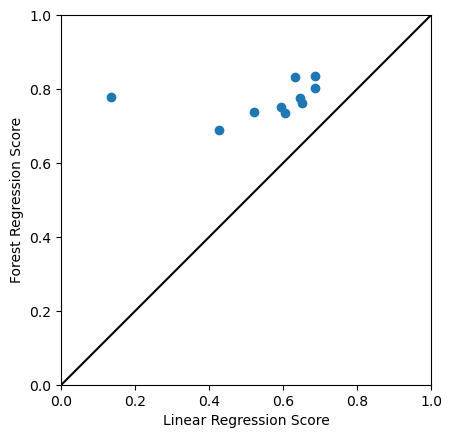

[('Fantasy', 0.0),
 ('Western', 0.0),
 ('Romance', 0.0),
 ('Mystery', 0.0),
 ('Music', 0.0),
 ('TV Movie', 0.0),
 ('Documentary', 4.4258387786587205e-06),
 ('Foreign', 1.3055712978699449e-05),
 ('Comedy', 7.16952604948862e-05),
 ('Family', 0.00018893850276085775),
 ('Animation', 0.00021207749487084604),
 ('Horror', 0.00025192254165660083),
 ('War', 0.00040394729868291595),
 ('History', 0.0007934288890231249),
 ('Thriller', 0.0011486489205423547),
 ('Crime', 0.001400302592064278),
 ('Drama', 0.0014961588028950602),
 ('Action', 0.0015091007297142365),
 ('Adventure', 0.002144482431211825),
 ('Science Fiction', 0.003086376060454788),
 ('vote_average', 0.012192632444786782),
 ('runtime', 0.01935055320361893),
 ('popularity', 0.06934756658143189),
 ('budget', 0.32088330239625673),
 ('vote_count', 0.5655013842977765)]

In [12]:
linear_regression_scores = cross_val_score(linear_regression, covariates, regression_outcome, cv=10, scoring=correlation)
forest_regression_scores = cross_val_score(forest_regression, covariates, regression_outcome, cv=10, scoring=correlation)

# Plot Results
plt.axes().set_aspect('equal', 'box')
plt.scatter(linear_regression_scores, forest_regression_scores)
plt.plot((0, 1), (0, 1), 'k-')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Linear Regression Score")
plt.ylabel("Forest Regression Score")

plt.show()

# Print the importance of each covariate in the random forest regression.
forest_regression.fit(positive_revenue_df[all_covariates], positive_revenue_df[regression_target])    
sorted(list(zip(all_covariates, forest_regression.feature_importances_)), key=lambda tup: tup[1])

### Exercise 7

In this exercise, we will compute cross-validated performance for the linear and random forest classification models for positive revenue movies only.

#### Instructions 

- Call `cross_val_score` using `logistic_regression` and `forest classifer` as models. Store the output as `logistic_regression_scores` and `forest_classification_scores`, respectively.
    - Set the parameters `cv=10` to use 10-fold cross-validation and `scoring=accuracy` to use our `accuracy` function defined in the previous exercise.
- Plotting code has been provided to compare the performance of the two models. Use `plt.show()` to plot the correlation between actual and predicted revenue for each cross-validation fold using the linear and random forest regression models.
- Which of the two models exhibits a better fit? Is this result different from what we observed when considering all movies?
- Code is provided for you that prints the importance of each covariate in predicting profitabilitiy using the random forests classifier. 
    - Which variables are most important?

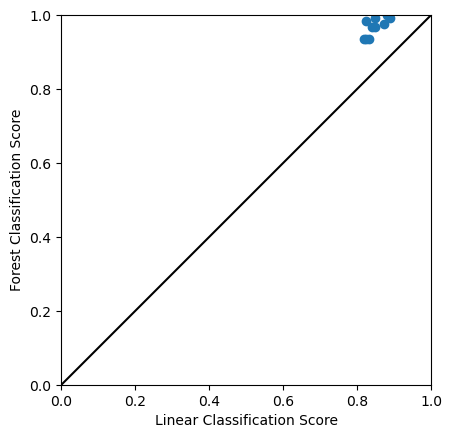

[('TV Movie', 0.0),
 ('Horror', 0.001715202327676785),
 ('Animation', 0.0019388197444951466),
 ('Comedy', 0.0022574689899296065),
 ('Foreign', 0.0022801352325337114),
 ('Documentary', 0.002846458591904433),
 ('Romance', 0.003161213512002131),
 ('Thriller', 0.0035594192203428437),
 ('Mystery', 0.004286613157552381),
 ('Music', 0.004308655018573079),
 ('Fantasy', 0.005193847625332299),
 ('Western', 0.005481306310114671),
 ('Family', 0.006661500982520504),
 ('Crime', 0.00677505762312986),
 ('History', 0.006793172805113654),
 ('Action', 0.007344068303198832),
 ('Adventure', 0.007603157260474831),
 ('Science Fiction', 0.0108175062853247),
 ('War', 0.011275947022575308),
 ('Drama', 0.023098371047518728),
 ('runtime', 0.04154729351420867),
 ('budget', 0.0876585364181174),
 ('vote_average', 0.1026182651382957),
 ('popularity', 0.28109135398059754),
 ('vote_count', 0.3696866298884673)]

In [15]:
logistic_regression_scores = cross_val_score(logistic_regression, covariates, classification_outcome, cv=10, scoring=accuracy)
forest_classification_scores = cross_val_score(forest_classifier, covariates, classification_outcome, cv=10, scoring=accuracy)

# Plot Results
plt.axes().set_aspect('equal', 'box')
plt.scatter(logistic_regression_scores, forest_classification_scores)
plt.plot((0, 1), (0, 1), 'k-')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Linear Classification Score")
plt.ylabel("Forest Classification Score")

plt.show()

# Print the importance of each covariate in the random forest classification.
forest_classifier.fit(positive_revenue_df[all_covariates], positive_revenue_df[classification_target])
sorted(list(zip(all_covariates, forest_classifier.feature_importances_)), key=lambda tup: tup[1])